In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [273]:
import pandas as pd 
import numpy as np 


In [274]:
DF_Main=pd.read_excel('C:/Users/MY PC/Desktop/DATA SCIENCE/AU_Financial_Bank/Case_study/case_study.xlsx')

In [275]:
DF=DF_Main.copy()

In [276]:
DF1=pd.read_excel('C:/Users/MY PC/Desktop/DATA SCIENCE/AU_Financial_Bank/Case_study/case_study_new.xlsx')

In [277]:
DF1

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,1,9,4,3,1754,5,5,6,3,1,...,1,101,3,2,3,3,2,2,1,1
1,2,72,2,3,8927,1,3,3,2,1,...,1,33,3,2,2,3,2,1,1,2
2,4,18,4,6,3144,1,4,3,3,1,...,1,74,3,2,2,2,3,1,1,1
3,1,63,2,2,11823,1,4,3,3,3,...,2,68,3,3,2,3,3,1,1,1
4,1,36,3,0,7305,1,3,5,3,1,...,4,80,3,3,3,3,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,18,2,2,2604,1,4,5,2,1,...,1,47,3,2,2,2,2,1,1,1
996,1,45,2,1,5786,1,3,6,1,1,...,2,60,3,2,2,4,2,2,1,1
997,4,18,2,3,1206,1,5,6,3,1,...,3,57,3,2,2,3,2,1,1,1
998,1,68,2,3,2768,1,3,6,3,1,...,4,35,3,3,2,3,2,2,1,2


In [278]:
DF.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.449000,4907.134000,4.606000,4.407000,53.566000,2.441000,2.155000,1.300000
std,18.055564,4234.100176,1.572016,1.570292,17.065664,0.697858,0.362086,0.458487
min,6.000000,375.000000,2.000000,2.000000,29.000000,2.000000,2.000000,1.000000
25%,18.000000,2048.250000,3.000000,3.000000,41.000000,2.000000,2.000000,1.000000
50%,27.000000,3479.500000,5.000000,5.000000,50.000000,2.000000,2.000000,1.000000
75%,36.000000,5958.500000,6.000000,6.000000,63.000000,3.000000,2.000000,2.000000
max,108.000000,27636.000000,6.000000,6.000000,113.000000,6.000000,3.000000,2.000000


In [279]:
DF.columns

Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'other_debtors', 'residing_since', 'property', 'age', 'inst_plans',
       'housing', 'num_credits', 'job', 'dependents', 'telephone',
       'foreign_worker', 'status'],
      dtype='object')

In [280]:
DF_VL=DF.drop(['checkin_acc', 'credit_history', 'purpose',
       'svaing_acc', 'present_emp_since','personal_status',
       'other_debtors', 'property','inst_plans',
       'housing','job', 'telephone',
       'foreign_worker'],axis=1)

In [281]:
features_with_na=[features for features in DF.columns if DF[features].isnull().sum()>1]

In [282]:
for feature in features_with_na:
    print(feature, np.round(DF[feature].isnull().mean(), 4),  ' % missing values')

In [283]:
DF.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
purpose              0
amount               0
svaing_acc           0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residing_since       0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
dtype: int64

In [284]:
# list of numerical variables
numerical_features = [feature for feature in DF.columns if DF[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
DF[numerical_features].head()
DF_NM=DF[numerical_features]

Number of numerical variables:  8


In [285]:
# list of Categorial variables
cat_features = [feature for feature in DF.columns if DF[feature].dtypes == 'O']

print('Number of categorial variables: ', len(cat_features))

# visualise the categorial variables
DF[cat_features].head()

Number of categorial variables:  13


,checkin_acc,credit_history,purpose,svaing_acc,present_emp_since,personal_status,other_debtors,property,inst_plans,housing,job,telephone,foreign_worker
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


In [224]:
for feature in cat_features:
    DF[feature] = DF[feature].apply(lambda x: str(x)[-1])
    

In [286]:
for feature in cat_features:
    print('[{}] [{}] {}'.format(feature,len(DF_Main[feature].unique()),(DF_Main[feature].unique())))

[checkin_acc] [4] ['A11' 'A12' 'A14' 'A13']
[credit_history] [5] ['A34' 'A32' 'A33' 'A30' 'A31']
[purpose] [10] ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
[svaing_acc] [5] ['A65' 'A61' 'A63' 'A64' 'A62']
[present_emp_since] [5] ['A75' 'A73' 'A74' 'A71' 'A72']
[personal_status] [4] ['A93' 'A92' 'A91' 'A94']
[other_debtors] [3] ['A101' 'A103' 'A102']
[property] [4] ['A121' 'A122' 'A124' 'A123']
[inst_plans] [3] ['A143' 'A141' 'A142']
[housing] [3] ['A152' 'A153' 'A151']
[job] [4] ['A173' 'A172' 'A174' 'A171']
[telephone] [2] ['A192' 'A191']
[foreign_worker] [2] ['A201' 'A202']


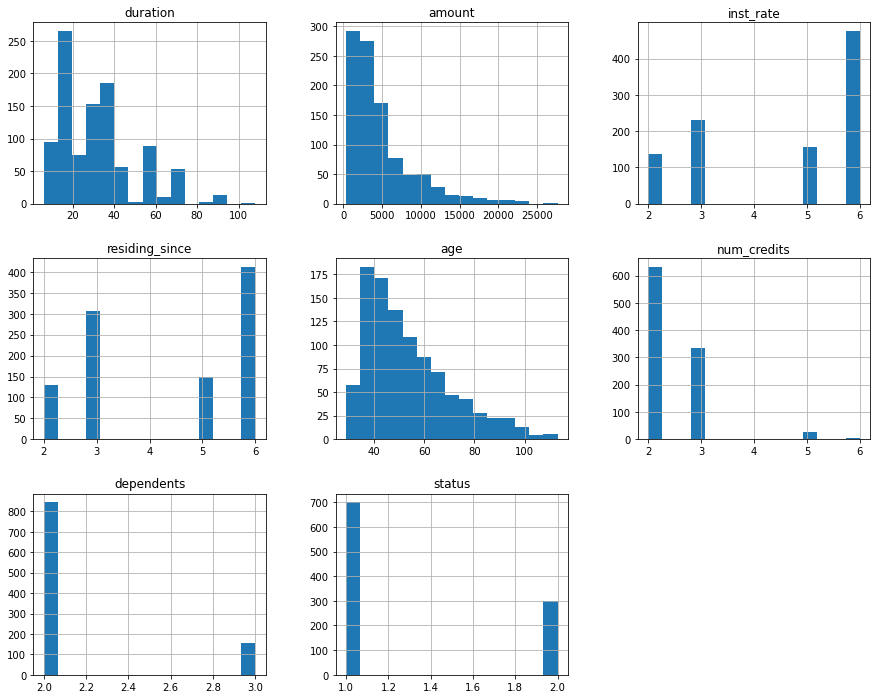

In [287]:
# Check the distribution of all the features
DF.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

# Check how differnt numerical features are realated to status

In [288]:
import math

In [289]:
# Number of rows and columns in the plot
numerical_features.remove('status')
n_cols = 3
n_rows = math.ceil(len(numerical_features)/n_cols)

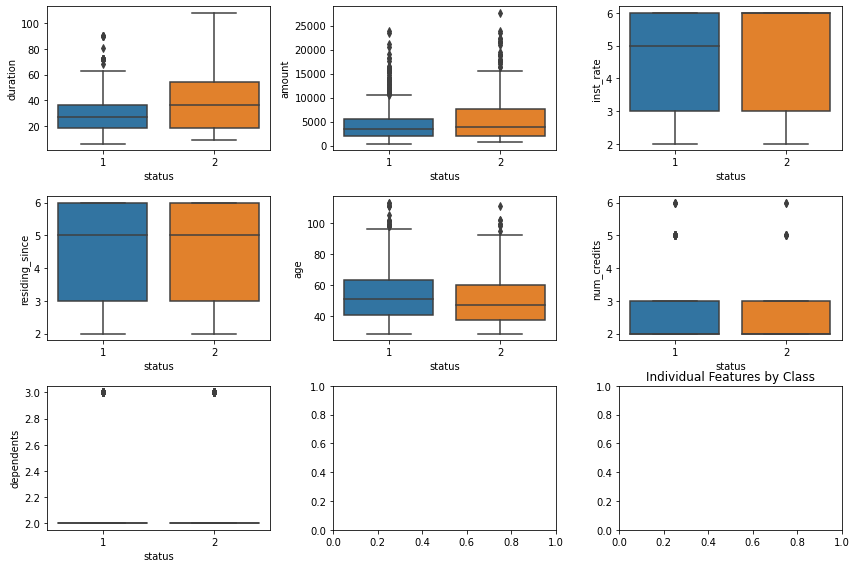

In [290]:
# Check the distribution of y variable corresponding to every x variable 
fig,ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(12,8))
row = 0
col = 0
for i in numerical_features:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = DF['status'], y = DF[i],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


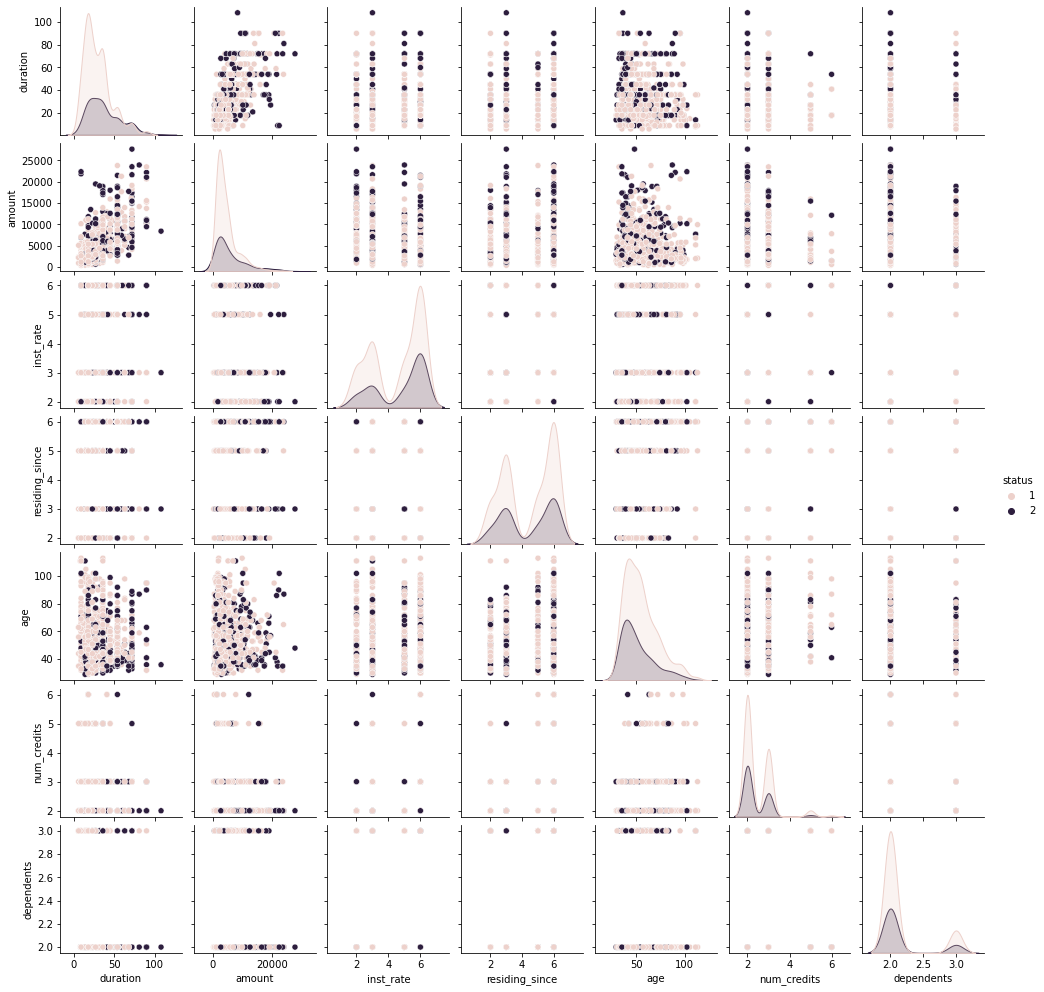

In [291]:
sns.pairplot(DF,hue="status",size=2)

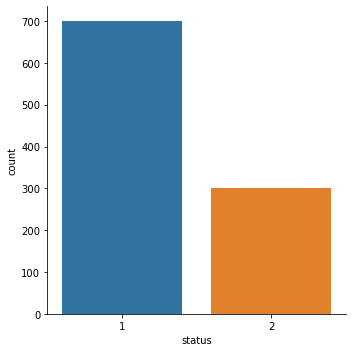

In [292]:
sns.catplot(x='status', data = DF, kind = 'count')

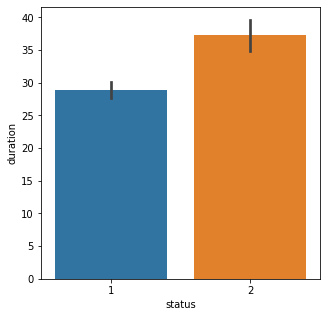

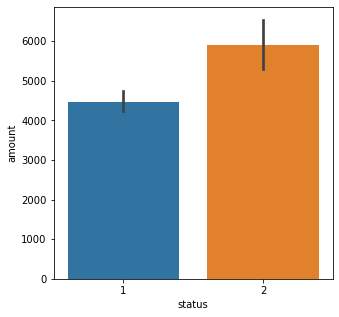

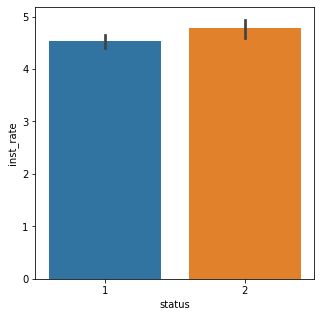

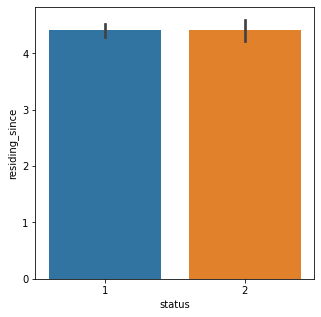

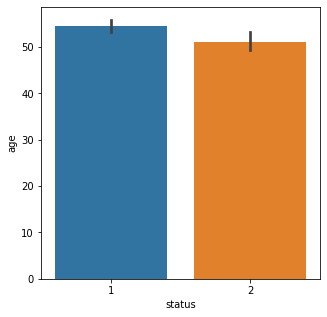

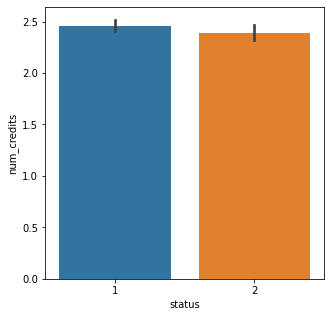

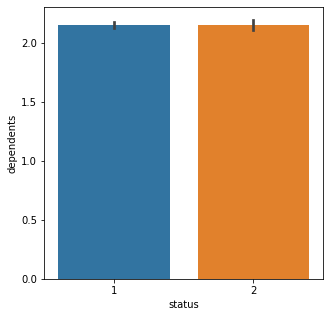

In [293]:
for feature in numerical_features:
    plot = plt.figure(figsize=(5,5))
    sns.barplot(x='status', y = feature, data = DF)


In [306]:
DF

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,0,9,4,4,1754,4,4,6,2,0,...,0,101,2,1,3,2,2,1,0,1
1,1,72,2,4,8927,0,2,3,1,0,...,0,33,2,1,2,2,2,0,0,2
2,3,18,4,7,3144,0,3,3,2,0,...,0,74,2,1,2,1,3,0,0,1
3,0,63,2,3,11823,0,3,3,2,2,...,1,68,2,2,2,2,3,0,0,1
4,0,36,3,0,7305,0,2,5,2,0,...,3,80,2,2,3,2,3,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,18,2,3,2604,0,3,5,1,0,...,0,47,2,1,2,1,2,0,0,1
996,0,45,2,1,5786,0,2,6,0,0,...,1,60,2,1,2,3,2,1,0,1
997,3,18,2,4,1206,0,4,6,2,0,...,2,57,2,1,2,2,2,0,0,1
998,0,68,2,4,2768,0,2,6,2,0,...,3,35,2,2,2,2,2,1,0,2


In [303]:
    oe = LabelEncoder()
    DF['checkin_acc']=oe.fit_transform(DF['checkin_acc'])

In [305]:
for feature in cat_features:
    oe = LabelEncoder()
    DF[feature] = oe.fit_transform(DF[feature])
    
    

    


# NO MEANING


for feature in cat_features:
    plot = plt.figure(figsize=(5,5))
    sns.barplot(x='status', y = feature, data = DF)

In [109]:
correlation = DF_NM.corr()

<AxesSubplot:>

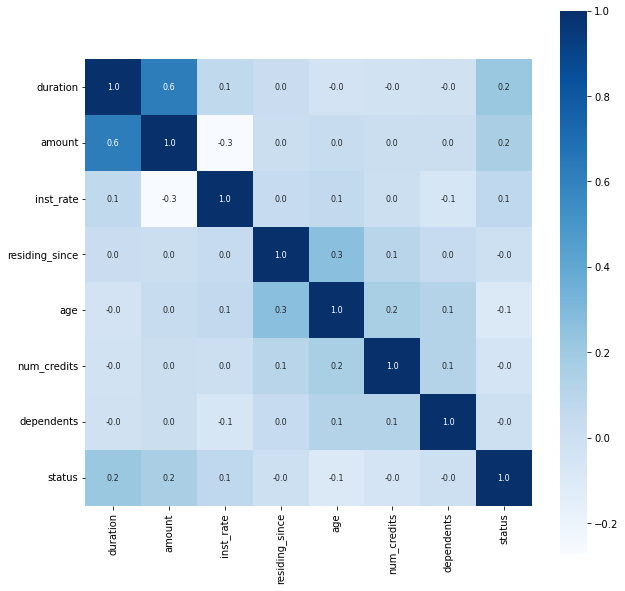

In [110]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [235]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in DF.columns if len(DF[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 18


In [236]:
discrete_feature

['checkin_acc',
 'credit_history',
 'purpose',
 'svaing_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'other_debtors',
 'residing_since',
 'property',
 'inst_plans',
 'housing',
 'num_credits',
 'job',
 'dependents',
 'telephone',
 'foreign_worker',
 'status']

In [238]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

cont_feature=[feature for feature in DF.columns if feature not in discrete_feature]
print("cont Variables Count: {}".format(len(cont_feature)))

cont Variables Count: 3


DATA PREPROCESSING

In [239]:
# separate the data and Label
X = DF1.drop('status',axis=1)

In [240]:
Y=DF1['status']

In [241]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [242]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1000,) (800,) (200,)


In [344]:

    def get_models(model=dict()):
        model[0] = DecisionTreeClassifier()
        model[1] = RandomForestClassifier()
    
    

In [345]:
for i in model:
    model= model[i]
    print(model)

TypeError: string indices must be integers

In [342]:
models_dict[3]

'DecisionTreeClassifier()'

In [381]:

    model= DecisionTreeClassifier()
    model.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    # accuracy on test data
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    print('Accuracy score of training data of model : ',model , training_data_accuracy)
    print('Accuracy of model : ',model, test_data_accuracy)
    print('confusion matix of model  : ',model, confusion_matrix(Y_test,X_test_prediction ))
    
    
    
    
    

Accuracy score of training data of model :  DecisionTreeClassifier() 1.0
Accuracy of model :  DecisionTreeClassifier() 0.675
confusion matix of model  :  DecisionTreeClassifier() [[104  35]
 [ 30  31]]


In [382]:
    model= RandomForestClassifier()
    model.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    # accuracy on test data
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    print('Accuracy score of training data of model : ',model , training_data_accuracy)
    print('Accuracy of model : ',model, test_data_accuracy)
    print('confusion matix of model  : ',model, confusion_matrix(Y_test,X_test_prediction ))

Accuracy score of training data of model :  RandomForestClassifier() 1.0
Accuracy of model :  RandomForestClassifier() 0.755
confusion matix of model  :  RandomForestClassifier() [[123  16]
 [ 33  28]]


In [383]:
    model=LogisticRegression()
    model.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    # accuracy on test data
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    print('Accuracy score of training data of model : ',model , training_data_accuracy)
    print('Accuracy of model : ',model, test_data_accuracy)
    print('confusion matix of model  : ',model, confusion_matrix(Y_test,X_test_prediction ))

Accuracy score of training data of model :  LogisticRegression() 0.76875
Accuracy of model :  LogisticRegression() 0.715
confusion matix of model  :  LogisticRegression() [[120  19]
 [ 38  23]]


C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [384]:
    model=GaussianNB()
    model.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    # accuracy on test data
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    print('Accuracy score of training data of model : ',model , training_data_accuracy)
    print('Accuracy of model : ',model, test_data_accuracy)
    print('confusion matix of model  : ',model, confusion_matrix(Y_test,X_test_prediction ))

Accuracy score of training data of model :  GaussianNB() 0.7575
Accuracy of model :  GaussianNB() 0.7
confusion matix of model  :  GaussianNB() [[104  35]
 [ 25  36]]


In [385]:
    model=SVC()
    model.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    # accuracy on test data
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    print('Accuracy score of training data of model : ',model , training_data_accuracy)
    print('Accuracy of model : ',model, test_data_accuracy)

Accuracy score of training data of model :  SVC() 0.715
Accuracy of model :  SVC() 0.705


In [372]:
    model=SGDClassifier()
    model.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    # accuracy on test data
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    print('Accuracy score of training data of model : ',model , training_data_accuracy)
    print('Accuracy of model : ',model, test_data_accuracy)
    print('confusion matix of model  : ',model, confusion_matrix(Y_test,X_test_prediction ))
    

Accuracy score of training data of model :  SGDClassifier() 0.70125
Accuracy of model :  SGDClassifier() 0.695
confusion matix of model  :  SGDClassifier() [[139   0]
 [ 61   0]]


In [386]:
    model=KNeighborsClassifier()
    model.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    # accuracy on test data
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    print('Accuracy score of training data of model : ',model , training_data_accuracy)
    print('Accuracy of model : ',model, test_data_accuracy)
    print('confusion matix of model  : ',model, confusion_matrix(Y_test,X_test_prediction ))

Accuracy score of training data of model :  KNeighborsClassifier() 0.75875
Accuracy of model :  KNeighborsClassifier() 0.665
confusion matix of model  :  KNeighborsClassifier() [[120  19]
 [ 48  13]]


In [371]:
confusion_matrix(Y_test,X_test_prediction )

array([[139,   0],
       [ 61,   0]], dtype=int64)

In [353]:
input_data=(1,9,4,3,17540000000,5,5,6,3,1,6,1,101,3,2,3,3,2,2,1)


In [354]:
input_data_as_numpy_array = np.asarray(input_data)

In [355]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [356]:
def reshaped(input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
    return input_data_reshaped
    
    

In [357]:
prediction = model.predict(reshaped(input_data))
print(prediction)
if (prediction[0]==1):
  print('Good customer')
else:
  print('Bad Customer')

[2]
Bad Customer


In [51]:

input_data=(1,9,4,3,1754,5,5,6,3,1,6,1,101,3,2,3,3,2,2,1)

In [361]:
 from sklearn.model_selection import cross_val_score

In [180]:
DF['checkin_acc'] = DF['checkin_acc'].apply(lambda x: str(x)[-1])

In [181]:
DF['checkin_acc']

0      1
1      2
2      4
3      1
4      1
      ..
995    4
996    1
997    4
998    1
999    2
Name: checkin_acc, Length: 1000, dtype: object

In [182]:
DF

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,1,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,2,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,4,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,1,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,1,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,18,A32,A42,2604,A61,A74,5,A92,A101,...,A121,47,A143,A152,2,A172,2,A191,A201,1
996,1,45,A32,A41,5786,A61,A73,6,A91,A101,...,A122,60,A143,A152,2,A174,2,A192,A201,1
997,4,18,A32,A43,1206,A61,A75,6,A93,A101,...,A123,57,A143,A152,2,A173,2,A191,A201,1
998,1,68,A32,A43,2768,A61,A73,6,A93,A101,...,A124,35,A143,A153,2,A173,2,A192,A201,2


In [254]:
len(DF_NM)

1000